In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sqlalchemy import create_engine

In [3]:
engine = create_engine("postgresql://postgres:@localhost:5432/postgres")
# подключение к базе данных PostgreSQL с помощью SQLAlchemy
df = pd.read_sql("""
SELECT
    country,
    count(*) as cnt
FROM netflix
GROUP BY country
ORDER BY cnt desc
LIMIT 20""", engine)  
df

,country,cnt
0,United States,2818
1,India,972
2,,831
3,United Kingdom,419
4,Japan,245
5,South Korea,199
6,Canada,181
7,Spain,145
8,France,124
9,Mexico,110


In [4]:
df = pd.read_sql("""
SELECT type, COUNT(*)
FROM netflix
GROUP BY type
""", engine) 
# запрос к базе данных PostgreSQL и сохранение результата в DataFrame
df 

,type,count
0,Movie,6131
1,TV Show,2676


<Axes: xlabel='type'>

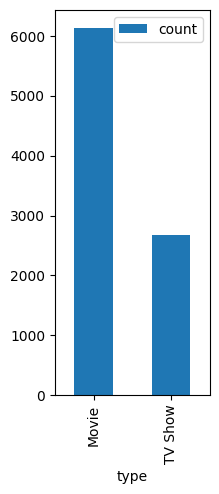

In [5]:
df.plot(kind='bar', x='type', y='count', figsize=(2,5))

In [6]:
df = pd.read_csv(r"C:\Jupyter_notebook\PandasNumPyCourse\data\netflix.csv")
df.head() # первые строки, чтобы увидеть названия колонок и примеры данных
# информация о датафрейме (считал просто csv файл локально)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
df.describe(include='O') # описательная статистика для категориальных колонок

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [8]:
df.describe().round() # основные статистические показатели для числовых колонок

,release_year
count,8807.0
mean,2014.0
std,9.0
min,1925.0
25%,2013.0
50%,2017.0
75%,2019.0
max,2021.0


In [9]:
df.info() # получение статистического резюме по числовым столбцам

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [10]:
df['type'].value_counts() # подсчет уникальных значений в столбце 'type'


type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [11]:
df.isnull().sum() # подсчет количества пропущенных значений в каждом столбце

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [12]:
df['listed_in'].str.split(', ').explode().value_counts().head(20) 


listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
TV Comedies                  581
Thrillers                    577
Crime TV Shows               470
Kids' TV                     451
Docuseries                   395
Music & Musicals             375
Romantic TV Shows            370
Horror Movies                357
Stand-Up Comedy              343
Reality TV                   255
Name: count, dtype: int64

<Axes: xlabel='release_year'>

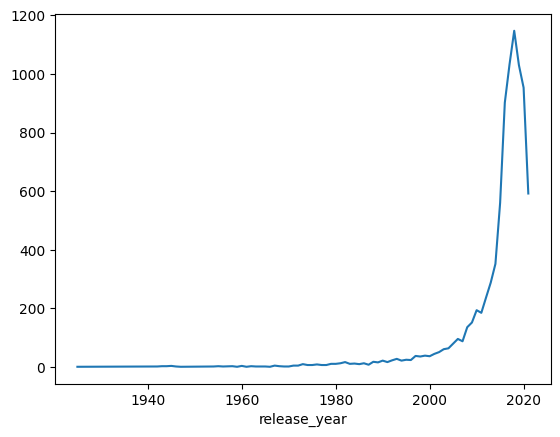

In [13]:
df['release_year'].value_counts().sort_index().plot(kind='line') 
# график количества фильмов и сериалов по годам выпуска 


In [14]:
df['director'].value_counts().head(10) 
# топ 10 режиссеров с наибольшим количеством фильмов и сериалов на Netflix 


director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64

In [15]:
director = df.groupby('director')['country'].value_counts().head(10)
# количество фильмов и сериалов по странам для каждого режиссера
director

director                        country
A. L. Vijay                     India      2
A. Raajdheep                    India      1
A. Salaam                       India      1
A.R. Murugadoss                 India      1
Aadish Keluskar                 India      1
Aamir Bashir                    India      1
Aamir Khan                      India      1
Aanand Rai                      India      1
Aaron Burns                     Chile      1
Aaron Hancox, Michael McNamara  Canada     1
Name: count, dtype: int64

In [16]:
countries = pd.read_sql("""
SELECT country,
       SUM(CASE WHEN type = 'Movie' THEN 1 ELSE 0 END) AS movies,
       SUM(CASE WHEN type = 'TV Show' THEN 1 ELSE 0 END) AS tv_shows,
       SUM(1) AS total
FROM (
  SELECT trim(c) AS country, type
  FROM netflix n
  CROSS JOIN LATERAL unnest(string_to_array(n.country, ',')) AS c
  WHERE n.country IS NOT NULL AND n.country <> ''
) t
GROUP BY country
ORDER BY total DESC
LIMIT 10""", engine)  
countries # топ 10 стран по количеству фильмов и сериалов на Netflix

,country,movies,tv_shows,total
0,United States,2752,938,3690
1,India,962,84,1046
2,United Kingdom,534,272,806
3,Canada,319,126,445
4,France,303,90,393
5,Japan,119,199,318
6,Spain,171,61,232
7,South Korea,61,170,231
8,Germany,182,44,226
9,Mexico,111,58,169


In [17]:
countries['share_movies'] = countries['movies'] / countries['total']
countries # добавление нового столбца с долей фильмов от общего количества

,country,movies,tv_shows,total,share_movies
0,United States,2752,938,3690,0.745799
1,India,962,84,1046,0.919694
2,United Kingdom,534,272,806,0.662531
3,Canada,319,126,445,0.716854
4,France,303,90,393,0.770992
5,Japan,119,199,318,0.374214
6,Spain,171,61,232,0.737069
7,South Korea,61,170,231,0.264069
8,Germany,182,44,226,0.805310
9,Mexico,111,58,169,0.656805


,country,movies,tv_shows,total,share_movies
0,United States,2752,938,3690,0.745799
1,India,962,84,1046,0.919694
2,United Kingdom,534,272,806,0.662531
3,Canada,319,126,445,0.716854
4,France,303,90,393,0.770992
5,Japan,119,199,318,0.374214
6,Spain,171,61,232,0.737069
7,South Korea,61,170,231,0.264069
8,Germany,182,44,226,0.805310
9,Mexico,111,58,169,0.656805


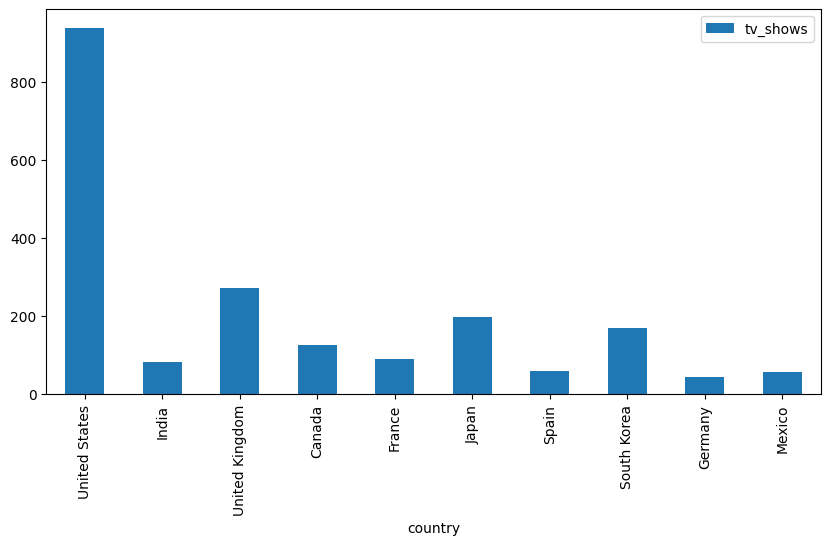

In [18]:
countries.plot(kind='bar', x='country', y='tv_shows', figsize=(10,5))
countries # график количества сериалов по странам

In [19]:
engine = create_engine("postgresql://postgres:@localhost:5432/postgres")
# подключение к базе данных PostgreSQL с помощью SQLAlchemy
df = pd.read_sql("""
SELECT *
FROM NETFLIX""", engine)  
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,,,,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,,,,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


<Axes: xlabel='country'>

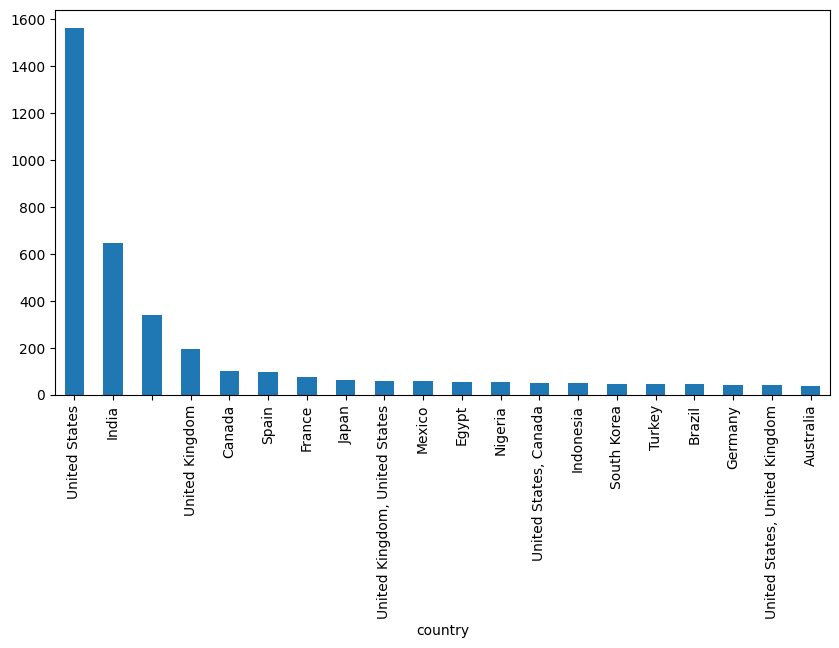

In [20]:
listed2 = df.groupby('country')['director'].nunique().sort_values(ascending=False).head(20) 
# топ 20 стран по количеству уникальных режиссеров
listed2.plot(kind='bar', x='country', y='director', figsize=(10,5))

In [21]:
df.groupby('country')['listed_in'].value_counts().sort_values(ascending=False).head(20)
# топ 20 жанров по количеству фильмов и сериалов в каждой стране

country        listed_in                                                 
United States  Documentaries                                                 249
               Stand-Up Comedy                                               209
India          Comedies, Dramas, International Movies                        120
               Dramas, International Movies                                  118
               Dramas, Independent Movies, International Movies              108
United States  Children & Family Movies, Comedies                             90
               Dramas                                                         88
               Comedies                                                       84
               Children & Family Movies                                       80
               Kids' TV                                                       77
Japan          Anime Series, International TV Shows                           75
United States  Dramas, Independent 

country
United States                    1561
India                             646
                                  340
United Kingdom                    196
Canada                            100
Spain                              96
France                             77
Japan                              62
United Kingdom, United States      59
Mexico                             58
Egypt                              54
Nigeria                            53
United States, Canada              51
Indonesia                          50
South Korea                        47
Turkey                             47
Brazil                             46
Germany                            42
United States, United Kingdom      39
Australia                          37
Name: director, dtype: int64

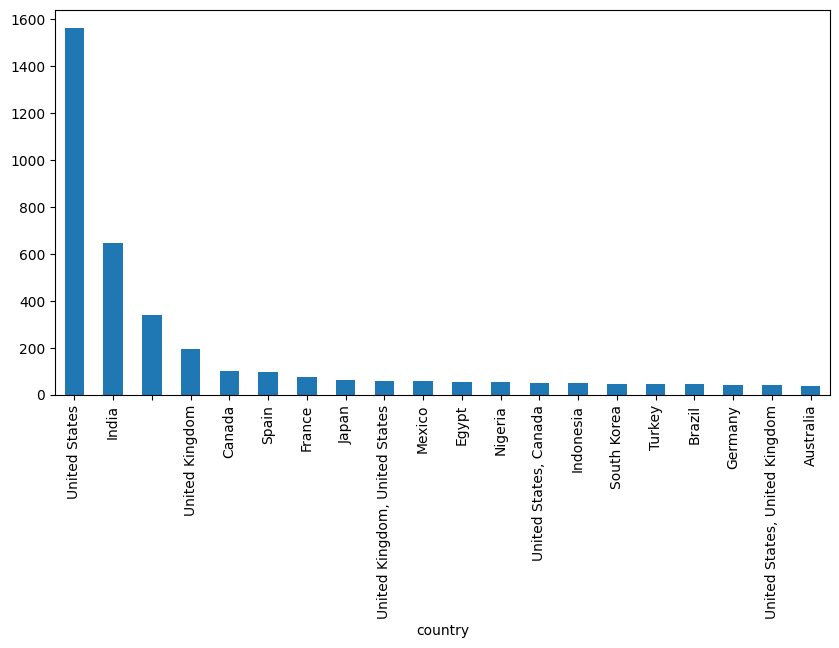

In [22]:
listed2.plot(kind='bar', x='listed_in', y='country', figsize=(10,5))
listed2


In [23]:
listed = df.groupby('listed_in')['country'].value_counts().sort_values(ascending=False).head(20)
# топ 20 стран по количеству фильмов и сериалов в каждом жанре
listed

listed_in                                                   country      
Documentaries                                               United States    249
Stand-Up Comedy                                             United States    209
Comedies, Dramas, International Movies                      India            120
Dramas, International Movies                                India            118
Dramas, Independent Movies, International Movies            India            108
Children & Family Movies, Comedies                          United States     90
Dramas                                                      United States     88
Comedies                                                    United States     84
Children & Family Movies                                    United States     80
Kids' TV                                                    United States     77
Anime Series, International TV Shows                        Japan             75
Dramas, Independent Movies         

country
United States                    1561
India                             646
                                  340
United Kingdom                    196
Canada                            100
Spain                              96
France                             77
Japan                              62
United Kingdom, United States      59
Mexico                             58
Egypt                              54
Nigeria                            53
United States, Canada              51
Indonesia                          50
South Korea                        47
Turkey                             47
Brazil                             46
Germany                            42
United States, United Kingdom      39
Australia                          37
Name: director, dtype: int64

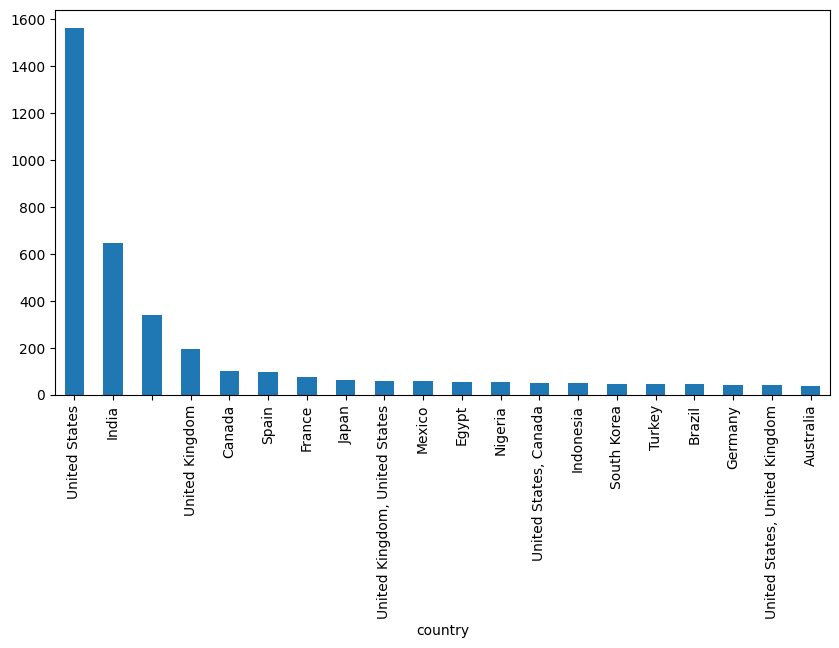

In [24]:
listed2.plot(kind='bar', x='listed_in', y='country', figsize=(10,5))
listed2


In [25]:
df = pd.read_csv(r"C:\Jupyter_notebook\PandasNumPyCourse\data\netflix.csv")
df.head() # первые строки, чтобы увидеть названия колонок и примеры данных
# информация о датафрейме (считал просто csv файл локально)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [26]:
df.groupby('rating')
 # обращение к столбцу 'rating' в DataFrame

In [27]:
df.groupby("rating")["title"].count()
# подсчет количества фильмов и сериалов для каждого рейтинга


rating
66 min         1
74 min         1
84 min         1
G             41
NC-17          3
NR            80
PG           287
PG-13        490
R            799
TV-14       2160
TV-G         220
TV-MA       3207
TV-PG        863
TV-Y         307
TV-Y7        334
TV-Y7-FV       6
UR             3
Name: title, dtype: int64

In [28]:
df.groupby("rating")["title"].count()
# подсчет количества уникальных значений в столбце 'rating' с сортировкой


rating
66 min         1
74 min         1
84 min         1
G             41
NC-17          3
NR            80
PG           287
PG-13        490
R            799
TV-14       2160
TV-G         220
TV-MA       3207
TV-PG        863
TV-Y         307
TV-Y7        334
TV-Y7-FV       6
UR             3
Name: title, dtype: int64

In [29]:
df["rating"].count()
# подсчет общего количества значений в столбце 'rating'

np.int64(8803)

In [30]:
df.groupby("rating", as_index=False)["title"].count()
# подсчет количества фильмов и сериалов для каждого рейтинга с сохранением рейтинга как столбца
# чтобы было можно потом построить график

,rating,title
0,66 min,1
1,74 min,1
2,84 min,1
3,G,41
4,NC-17,3
5,NR,80
6,PG,287
7,PG-13,490
8,R,799
9,TV-14,2160
